In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import scanpy as sc
import os
import enlighten
import pandas as pd
import glob

import scanpy as sc 
import sys 
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import glob
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import random
warnings.filterwarnings('ignore')
sys.path.append('/ix3/djishnu/alw399/SpaceOracle/src')

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-06-16 18:31:57.255058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-16 18:31:57.900942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LI

In [3]:
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography

In [4]:
adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/snrna_human_tonsil.h5ad')

del adata.uns['received_ligands']
del adata.uns['received_ligands_tfl']

adata.uns['cell_thresholds'] = pd.DataFrame(
    index=adata.obs.index, 
    columns=adata.var_names).fillna(1)

adata

AnnData object with n_obs × n_vars = 5778 × 3333
    obs: 'cell_type', 'author_cell_type', 'cell_type_int', 'banksy_celltypes'
    uns: 'cell_thresholds', 'cell_type_int_colors'
    obsm: 'spatial', 'spatial_unscaled'
    layers: 'imputed_count', 'normalized_count'

In [5]:
adata.obs = adata.obs.join(pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/human_tonsil/tonsil_cell_types.csv', index_col=0))

In [6]:
import random
from spaceoracle.virtual_tissue import VirtualTissue

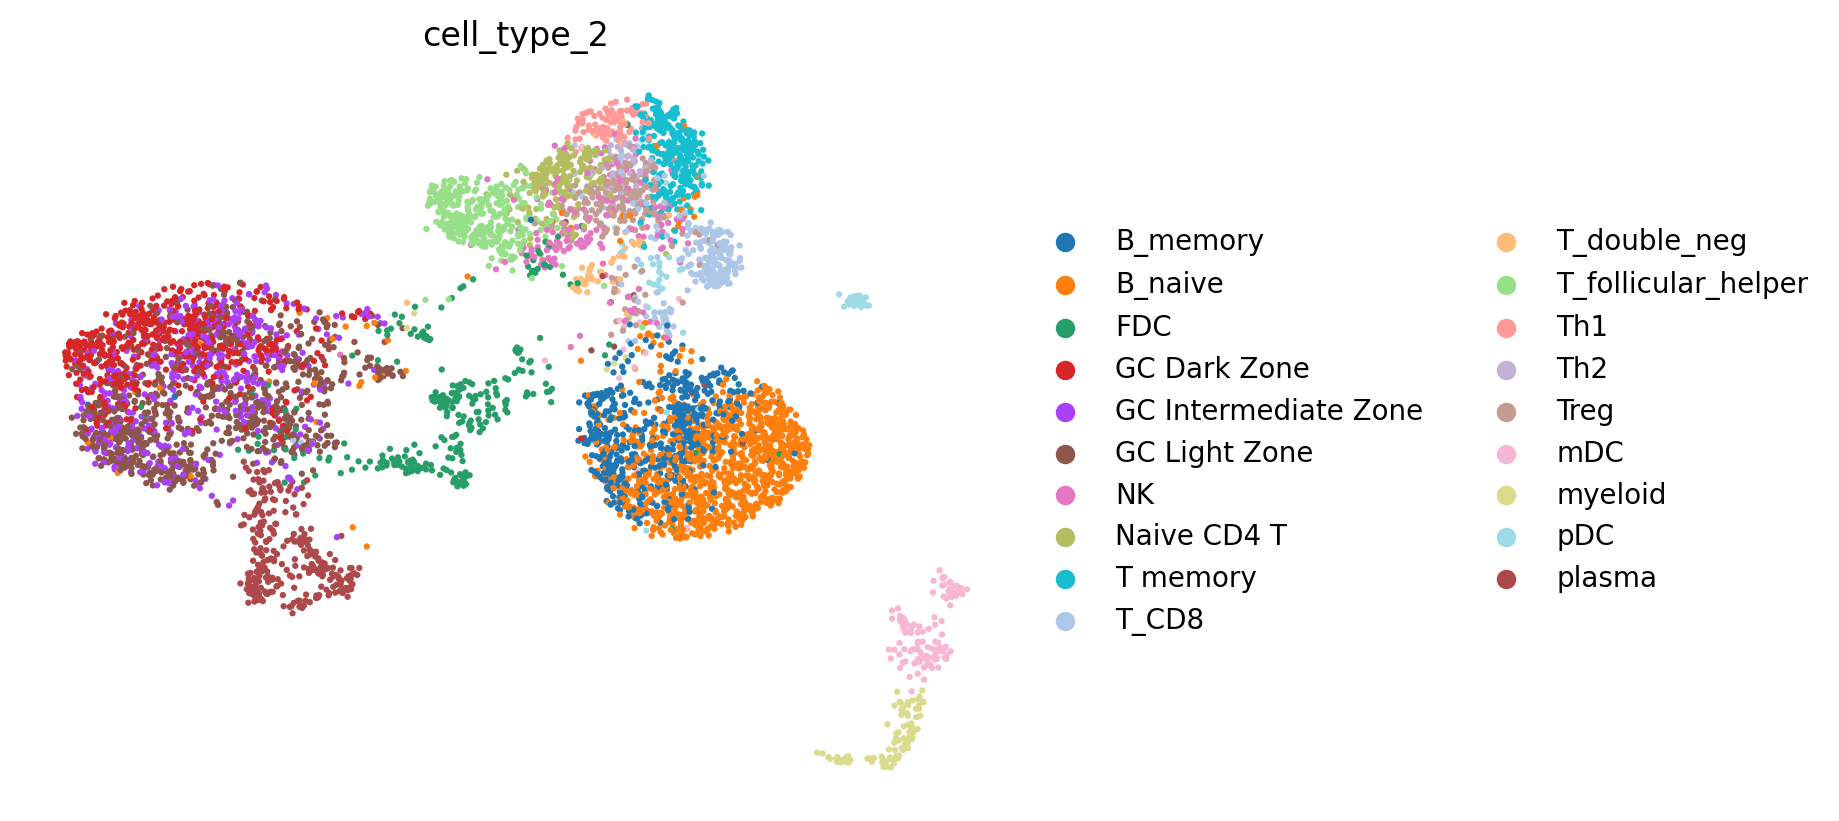

In [7]:
adata.obsm['X_umap'] = pd.read_csv('/ix3/djishnu/alw399/SpaceOracle/notebooks/human_tonsil/umap.csv', index_col=0).values
sc.pl.umap(adata, color=['cell_type_2'], frameon=False)

In [8]:
ko_path = '/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT_spatial'
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    betadatas_path = '/ix/djishnu/shared/djishnu_kor11/scGPT_runs/tonsil_spatial',
    ko_path = ko_path
)

In [9]:
# tonsil.compute_ko_impact(force_recompute=True)

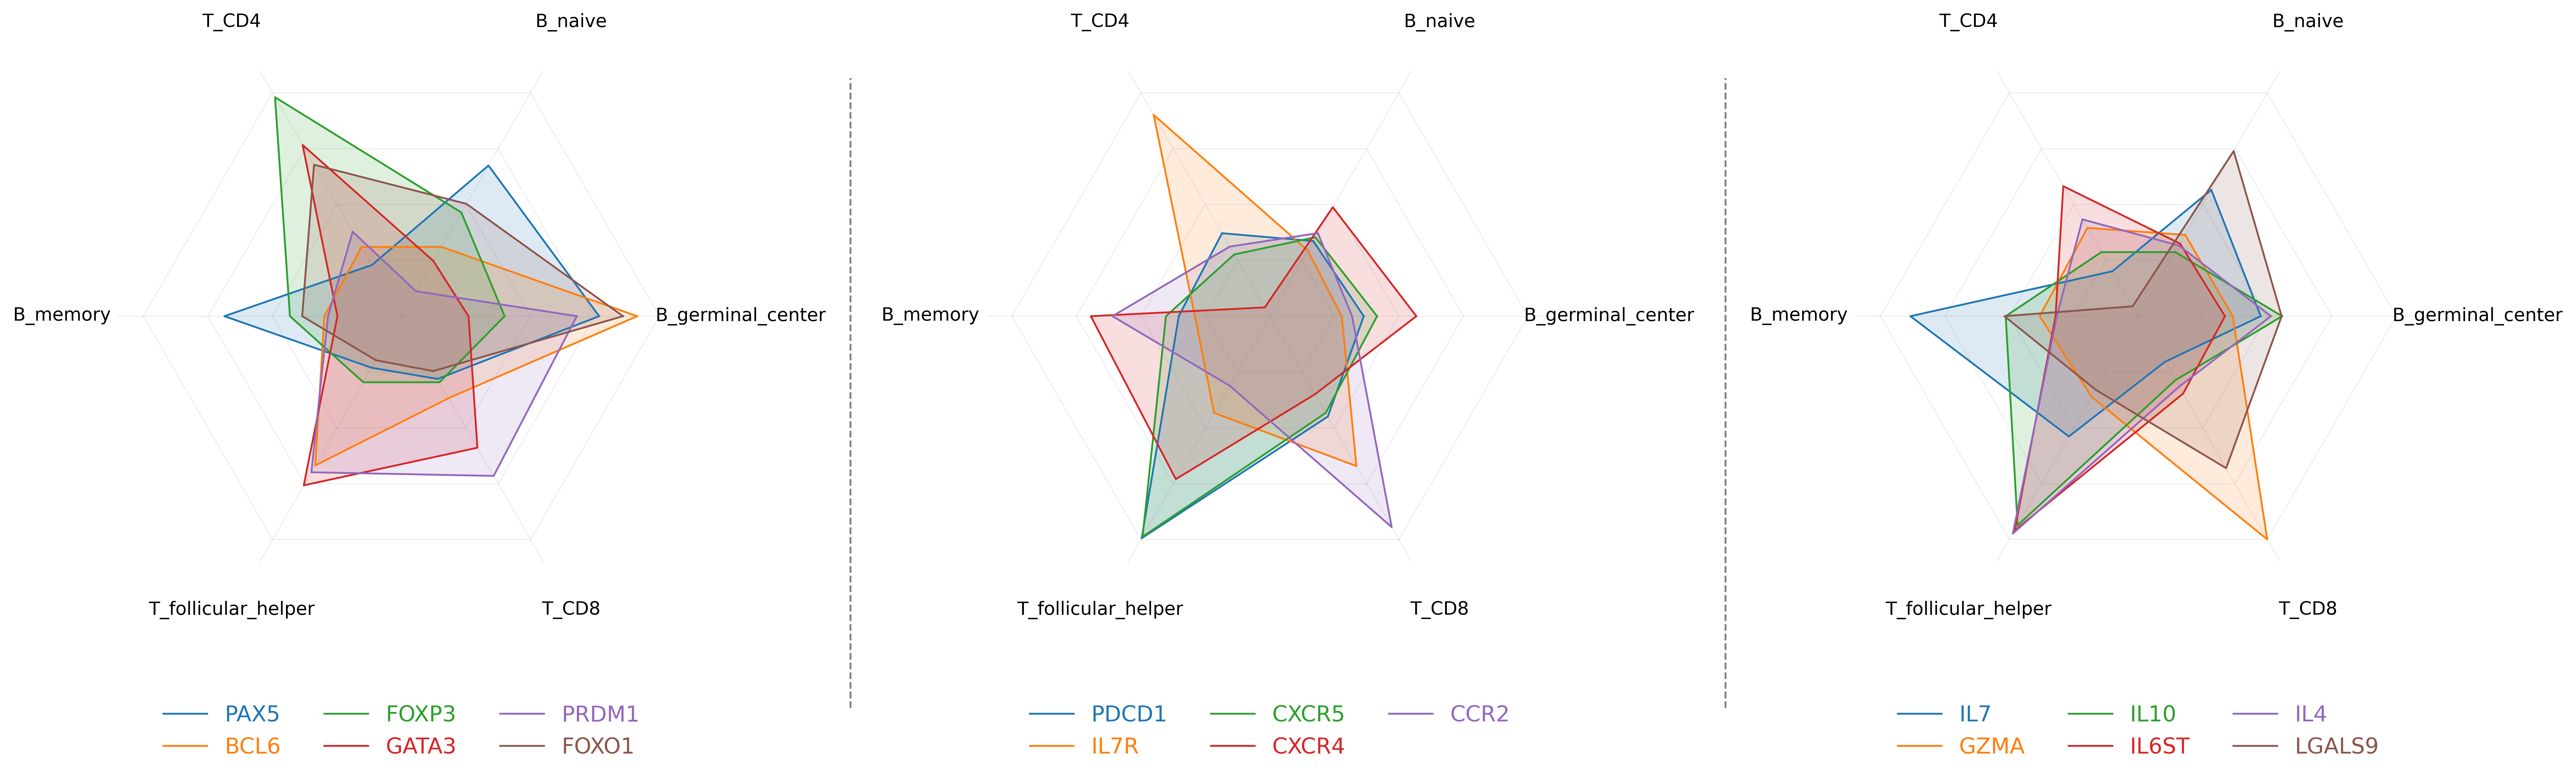

In [10]:
tonsil.plot_radar(genes=[['PAX5', 'BCL6', 'FOXP3', 'GATA3', 'PRDM1', 'FOXO1'], 
                         ['PDCD1','IL7R', 'CXCR5', 'CXCR4', 'CCR2'],
                         ['IL7', 'GZMA', 'IL10', 'IL6ST', 'IL4', 'LGALS9']], 
    show_for=['B_germinal_center', 'B_naive', 'T_CD4', 
    'B_memory', 'T_follicular_helper', 'T_CD8'])

plt.savefig('tonsil_scGPT_spatial_radar.svg', format='svg', bbox_inches='tight', dpi=300)

In [8]:
adata.obs['cell_type_major'] = adata.obs.cell_type_2.replace(
    {
        'GC Dark Zone': 'Germinal Center B cells', 
        'GC Light Zone': 'Germinal Center B cells', 
        'GC Intermediate Zone': 'Germinal Center B cells', 
        'plasma': 'Plasma cells', 
        'B_naive': 'B cells', 
        'B_memory': 'B cells', 
        'B_germinal_center': 'Germinal Center B cells', 
        'Naive CD4 T': 'T cells', 
        'Treg': 'T cells', 
        'T memory': 'T cells', 
        'Th1': 'T cells', 
        'Th2': 'T cells', 
        'T_CD8': 'T cells', 
        'T_follicular_helper': 'T cells', 
        'mDC': 'Dendritic cells', 
        'FDC': 'Dendritic cells', 
        'myeloid': 'Myeloid cells', 
        'NK': 'NK cells', 
        'pDC': 'Dendritic cells', 
        'T_double_neg': 'T cells'
    }
)

In [9]:
color_dict = {
    'GC Dark Zone': "#f14e13",
    'GC Light Zone': "#0feca9",
    'GC Intermediate Zone':  "#4492e0",
    'plasma': "#61c17c",
    'B_naive': "#308f0e", 
    'B_memory': "#beb637",
    'B_germinal_center': "#8995cf",
    'Naive CD4 T': "#f721b7",
    'Treg': "#ecc91d",
    'T memory': "#49f12f",
    'Th1': "#c43cf2",
    'Th2': "#5e6ff3",
    'T_CD8': "#dd3652",
    'T_CD4': "#2b07f6",
    'T_follicular_helper': "#e28723",
    'mDC': "#a5a29e", 
    'FDC': "#a5a29e", 
    'myeloid': "#a5a29e", 
    'NK': "#a5a29e", 
    'pDC': "#a5a29e", 
    'T_double_neg': "#a5a29e",
    'Germinal Center B cells': "#6295cd",
    'Plasma cells': "#58a862",
    'T cells': "#cc5343",
    'B cells': "#9865c8",
    'Dendritic cells': "#9da13c",
    'Myeloid cells': "#f3c009",
    'NK cells': "#a36e29",
}

In [10]:
ko_path

NameError: name 'ko_path' is not defined

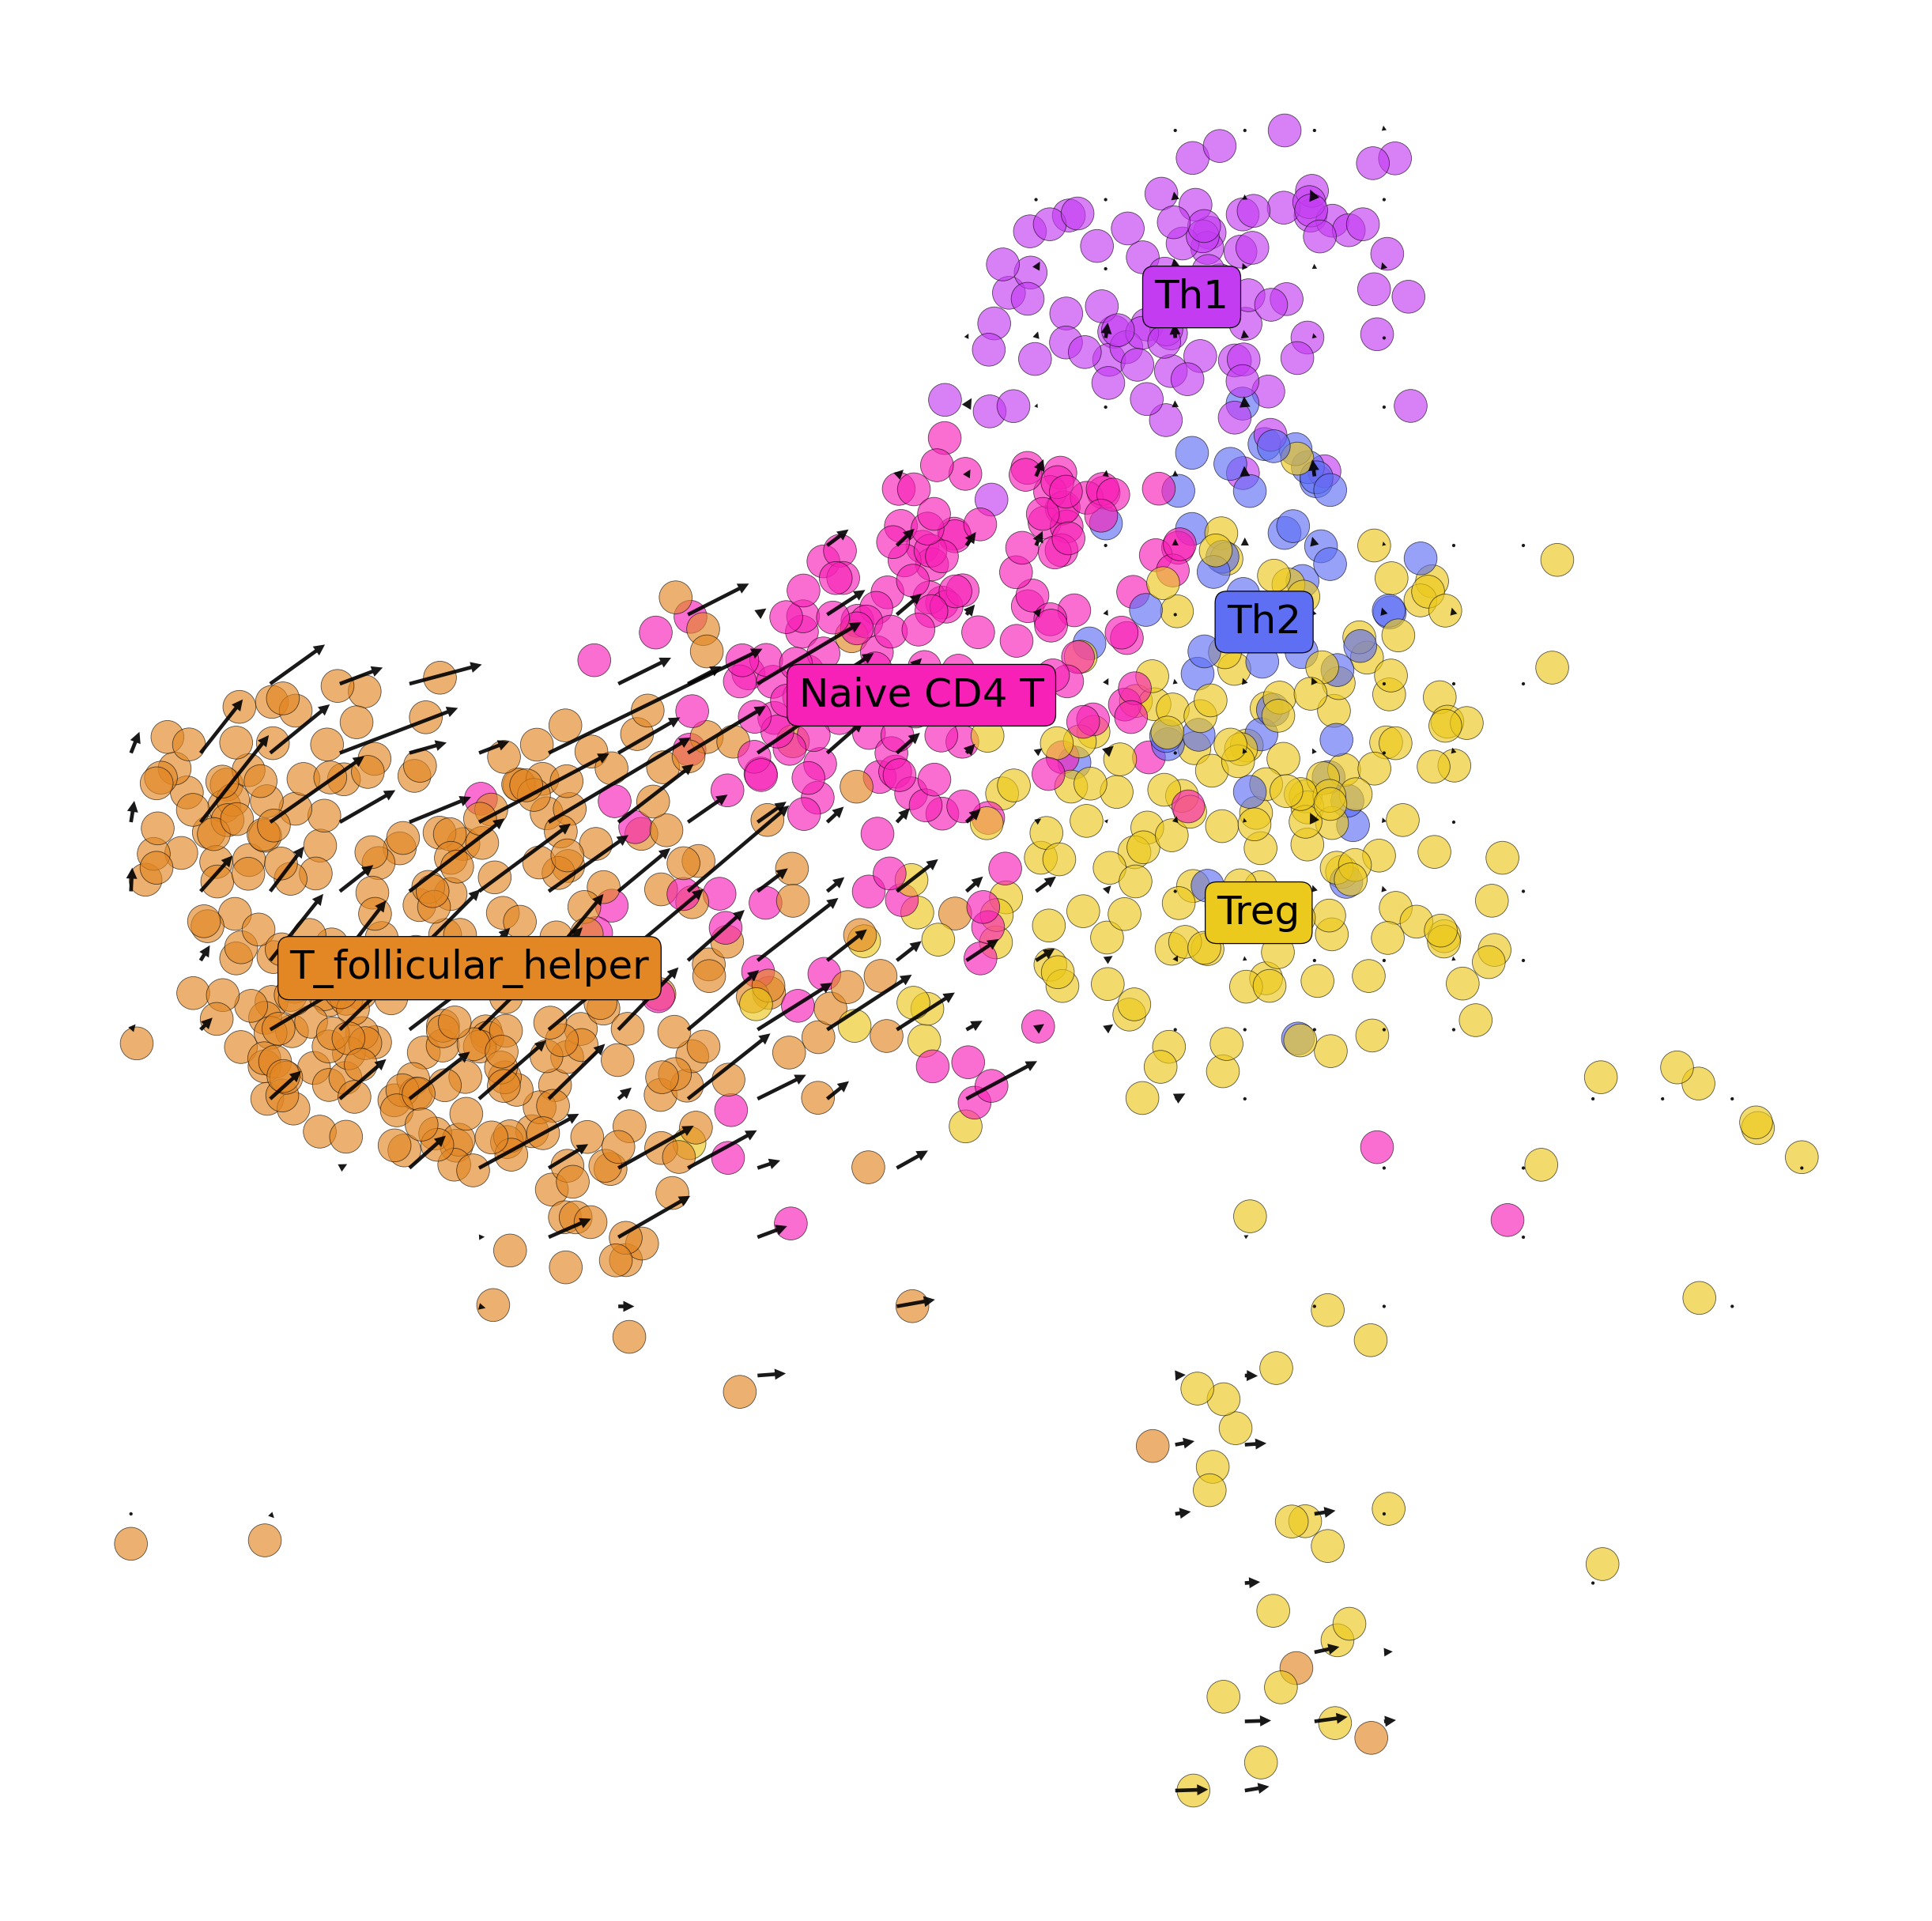

In [14]:
from spaceoracle.plotting.cartography import Cartography

chart = Cartography(adata[
    adata.obs.cell_type_2.isin([
        'Naive CD4 T',
        'T_follicular_helper', 
        'Th2', 
        'Th1', 
        'Treg',
    
        # 'T memory', 
        # 'GC Dark Zone',
        # 'GC Light Zone',
        # 'GC Intermediate Zone'
    ])], 
color_dict)

perturb_target = 'IL21'

# perturbed_df = pd.read_parquet(
#     f'{os.path.join(ko_path, perturb_target)}_4n_maxx.parquet')
perturbed_df = pd.read_parquet(
    f'{os.path.join(ko_path, perturb_target)}_4n_0x.parquet')


_ = chart.plot_umap_quiver(
    perturb_target=perturb_target,
    grid_scale=1,
    vector_scale=0.9,
    n_neighbors=150,
    figsize=(5, 5), 
    hue='cell_type_2',
    alpha=0.65,
    perturbed_df=perturbed_df,
    scatter_size=25,
    remove_null=True,
    legend_on_loc=True,
    legend_fontsize=6,
)

plt.show()

In [11]:
tonsil = VirtualTissue(
    adata = adata,
    annot = 'cell_type_2',
    betadatas_path = '/ix/djishnu/shared/djishnu_kor11/scGPT_runs/tonsil_spatial',
    ko_path = '/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT_spatial'
)

In [12]:
from spaceoracle.models.parallel_estimators import create_spatial_features

spf = create_spatial_features(
    x=adata.obsm['spatial'][:, 0], 
    y=adata.obsm['spatial'][:, 1], 
    celltypes=adata.obs.cell_type_2, 
    obs_index=adata.obs_names
)

cell_groups = {
    'GC B Cells': ['GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone'],
    'B cells': ['GC Light Zone', 'GC Dark Zone', 'GC Intermediate Zone', 'B_naive', 'B_memory'],
    # 'T cells': ['Naive CD4 T', 'T_follicular_helper', 'Th2', 'Th1', 'Treg'],
    'T cells': ['T_follicular_helper'],
}

In [13]:
from scipy.stats import pearsonr

from spaceoracle.plotting.cartography import xy_from_adata

xy = xy_from_adata(adata)

def plot_gene_vs_proximity(perturb_target, gene, color_gene, cell_filter, proximity_cell,
                          proximity_threshold=150, gene_threshold=-5000, ax=None, mode='ko',
                          ko_path='/Volumes/SSD/genome_screens/human_tonsil/'):
    suffix = '_4n_maxx.parquet' if mode == 'maxx' else '_4n_0x.parquet'
    perturbed_df = pd.read_parquet(
        os.path.join(ko_path, f'{perturb_target}{suffix}')
    )

    print(cell_groups.keys())
    
    datadf = spf[
        [i+'_within' for i in cell_groups[proximity_cell]
            ]].sum(1).to_frame().join(adata.obs.cell_type_2).query(
             f'cell_type_2.isin(["{cell_filter}"])').join(xy).join(
        ((perturbed_df-adata.to_df(layer='imputed_count'))/adata.to_df(layer='imputed_count'))*100
    )
    datadf = datadf[datadf[0] < proximity_threshold]
    
    if ax is None:
        ax = plt.gca()
    
    try:
        corr = pearsonr(datadf[datadf[gene]>gene_threshold][0], datadf[datadf[gene]>gene_threshold][gene]).statistic
        ax.set_title(f"{perturb_target} {mode.upper()} in\n{cell_filter}\nCorrelation: {corr:.4f}")
    except:
        corr = 0
        ax.set_title(f"{perturb_target} {mode.upper()} in\n{cell_filter}")
        
    scatter = ax.scatter(
        datadf[0], 
        datadf[gene], 
        c=datadf[color_gene],
        cmap='rainbow',
    )
    plt.colorbar(scatter, label=f'{color_gene} % change', shrink=0.75, ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel(f'{gene} % change')
    ax.set_xlabel(f'Number of {proximity_cell} within 200um')
    # ax.set_xlabel('Number of T cells within 200um')
    
    return ax, datadf

dict_keys(['GC B Cells', 'B cells', 'T cells'])


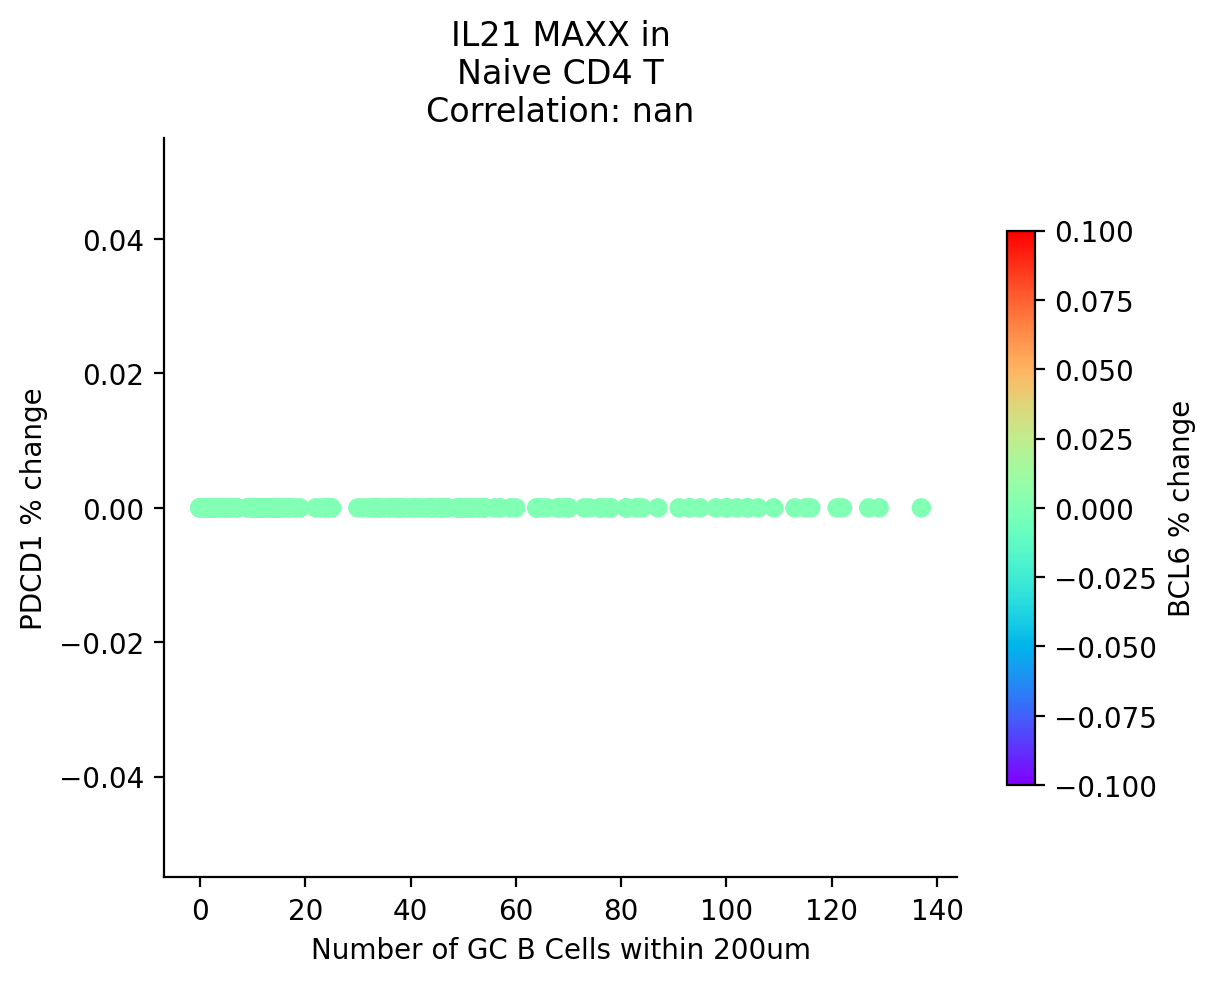

In [14]:
ax, datadf = plot_gene_vs_proximity(
    perturb_target='IL21', 
    proximity_cell='GC B Cells',
    # gene='GATA3', 
    gene='PDCD1',
    color_gene='BCL6', 
    cell_filter='Naive CD4 T', 
    # cell_filter='T_follicular_helper', 
    # cell_filter='GC Dark Zone', 
    mode='maxx',
    # mode='ko',
    ko_path='/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT_spatial'
    
)
plt.savefig('human_tonsil_scGPT_spatial_IL21_4n_maxx_PDCD1_vs_BCL6.svg', format='svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

dict_keys(['GC B Cells', 'B cells', 'T cells'])


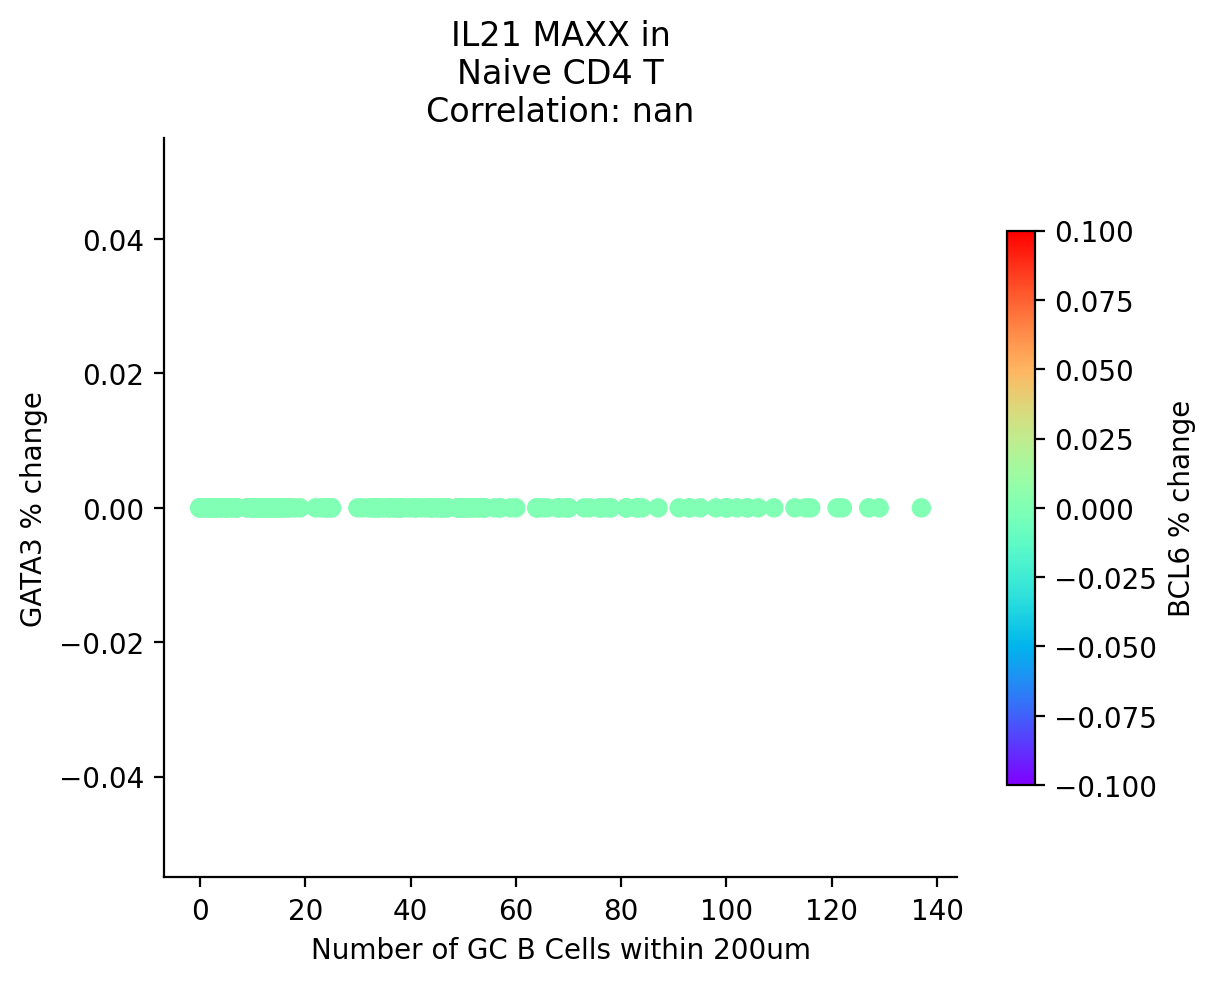

In [15]:
ax, datadf = plot_gene_vs_proximity(
    perturb_target='IL21', 
    proximity_cell='GC B Cells',
    gene='GATA3', 
    # gene='PDCD1',
    color_gene='BCL6', 
    cell_filter='Naive CD4 T', 
    # cell_filter='T_follicular_helper', 
    # cell_filter='GC Dark Zone', 
    mode='maxx',
    # mode='ko',
    ko_path='/ix/djishnu/shared/djishnu_kor11/genome_screens/human_tonsil_scGPT_spatial'
)
plt.savefig('human_tonsil_scGPT_spatial_IL21_4n_maxx_GATA3_vs_BCL6.svg', format='svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()